# Problem Set 7, Part One: Due Thursday, March 20 by 8am Eastern Daylight Time

## Name: David Millard

**Show your work on all problems!** Be sure to give credit to any
collaborators, or outside sources used in solving the problems. Note
that if using an outside source to do a calculation, you should use it
as a reference for the method, and actually carry out the calculation
yourself; it’s not sufficient to quote the results of a calculation
contained in an outside source.

Fill in your solutions in the notebook below, inserting markdown and/or code cells as needed.  Try to do reasonably well with the typesetting, but don't feel compelled to replicate my formatting exactly.  **You do NOT need to make random variables blue!**

In [1]:
%matplotlib inline

In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8.0,5.0)
plt.rcParams['font.size'] = 14

### Conover Problems on The Friedman and Quade Tests

#### Exercise 5.8.2:

Twelve randomly selected students are involved in a learning experiment.
Four lists of words are made up by the experimenter. Each list contains
20 pairs of words, but different methods of pairing are used on the four
lists. Each student is handed a list, given five minutes to study it,
and then examined on his or her ability to remember the words. This
procedure is repeated for all four lists for each student, the order of
the lists being rotated from one student to the next. The examination
scores are as follows (20 is perfect).

<table>
<tr><th>List</th><th>1</th><th>2</th><th>3</th><th>4</th><th>5</th><th>6</th><th>7</th><th>8</th><th>9</th><th>10</th><th>11</th><th>12</th></tr>
<tr><td>1</td><td>  18</td><td> 7</td><td>13</td><td>15</td><td>12</td><td>11</td><td>15</td><td>10</td><td>14</td><td> 9</td><td>  8</td><td>  10</td></tr>
<tr><td>2</td><td>  14</td><td> 6</td><td>14</td><td>10</td><td>11</td><td> 9</td><td>16</td><td> 8</td><td>12</td><td> 9</td><td>  6</td><td>  11</td></tr>
<tr><td>3</td><td>  16</td><td> 5</td><td>16</td><td>12</td><td>12</td><td> 9</td><td>10</td><td>11</td><td>13</td><td> 9</td><td>  9</td><td>  13</td></tr>
<tr><td>4</td><td>  20</td><td>10</td><td>17</td><td>14</td><td>18</td><td>16</td><td>14</td><td>16</td><td>15</td><td> 10</td><td> 14</td><td> 16</td></tr>
</table>

Are some lists easier to learn than others?

In [3]:
X_ij = np.array([
    [18,  7, 13, 15, 12, 11, 15, 10, 14,  9,  8, 10],
    [14,  6, 14, 10, 11,  9, 16,  8, 12,  9,  6, 11],
    [16,  5, 16, 12, 12,  9, 10, 11, 13,  9,  9, 13],
    [20, 10, 17, 14, 18, 16, 14, 16, 15, 10, 14, 16]
])
b,k = np.shape(X_ij)

**(a)** Use the Friedman test. \[Calculate a $p$-value.\]

$H_0$: There are no differences between the treatments.

$H_1$: There is a difference between the treatments.

$T_1 = 18.5$ 

$p\text{-value} = 0.000346$

Since $0.000346 < 0.05$, we have sufficent evidence to reject $H_0$

In [4]:
print(b, k)

R_ij = stats.rankdata(X_ij,axis=0)
R_j = np.sum(R_ij,axis=1)

print(f'{R_ij}\n\n{R_j}')

4 12
[[3.  3.  1.  4.  2.5 3.  3.  2.  3.  2.  2.  1. ]
 [1.  2.  2.  1.  1.  1.5 4.  1.  1.  2.  1.  2. ]
 [2.  1.  3.  2.  2.5 1.5 1.  3.  2.  2.  3.  3. ]
 [4.  4.  4.  3.  4.  4.  2.  4.  4.  4.  4.  4. ]]

[29.5 19.5 26.  45. ]


In [5]:
Rbar = 0.5*(b+1)
T1 = (b-1)*np.sum((R_j-k*Rbar)**2)/np.sum((R_ij-Rbar)**2); T1

18.5

In [6]:
p = stats.chi2(df=b-1).sf(T1); p

0.0003468294018257528

In [7]:
stats.friedmanchisquare(X_ij[0,:],X_ij[1,:],X_ij[2,:],X_ij[3,:]) # sanity check

FriedmanchisquareResult(statistic=18.500000000000018, pvalue=0.00034682940182575024)

**(b)** Use the Quade test. \[Calculate a $p$-value.\]

$H_0$: There are no differences between the treatments.

$H_1$: There is a difference between the treatments.

$T_3 = 29.2129$ 

$p\text{-value} = 2.075\exp{-09}$

Since $2.075\exp{-09} < 0.05$, we have sufficent evidence to reject $H_0$.

In [8]:
M_i = np.max(X_ij,axis=0)-np.min(X_ij,axis=0)
Q_i = stats.rankdata(M_i)

print(f'{M_i}\n\n{Q_i}')

[6 5 4 5 7 7 6 8 3 1 8 6]

[ 7.   4.5  3.   4.5  9.5  9.5  7.  11.5  2.   1.  11.5  7. ]


In [9]:
S_ij = Q_i[:,None]*(R_ij.reshape(12, 4)-0.5*(k+1))
S_j = np.sum(S_ij,axis=0)

print(S_j)

B = np.sum(S_j**2)/k;
A2 = np.sum(S_ij**2) 
T3 = (k-1)*B/(A2-B)

print(B, A2, T3)

stats.f(b-1,(k-1)*(b-1)).sf(T3)

[-317.5 -318.  -330.5 -302.5]
33555.5625 46190.75 29.212956871435427


2.0750041054102203e-09

#### Problem 5.8.1:

Show that for $k=2$ the statistic $T_3$ is a function of the Wilcoxon
signed ranks statistic given by Equation 5.7.5 and, therefore the two
tests are equivalent. (*Hint.* First show that $Q_i$ is equal to the
absolute value of $R_i$.)

We know that $W = \sum_{i: D_i > 0} R_i$ and $W^- = \sum_{i: D_i < 0} R_i$. Showing $Q_i$ is equal to the absolute value of $R_i$.

\begin{align}
D_i &= X_i - Y_i, \quad R_i = \text{rank}(|D_i|) \\  
M_i &= \max_j X_{ij} - \min_j X_{ij} \\  
Q_i &= \text{rank}(M_i) \\  
&= \text{rank}(|X_i - Y_i|) \\  
&= R_i.
\end{align}

\begin{align}
    S_{ij} &= Q_i \left(R_{ij} - \frac{k+1}{2}\right) \\
           &= R_i \left(R_{ij} - \frac{3}{2}\right) \\
           &= R_i \left(1 - \frac{3}{2}\right), \quad R_i \left(2 - \frac{3}{2}\right) \quad \text{Where } j \in \{1, 2\}\\
           &= -0.5R_i, \quad 0.5R_i \\
\end{align}

\begin{align}
    S_j &= \sum_{i=1}^b S_{ij} \\
        &= \sum_{i=1}^b R_i \left(R_{ij} - \frac{3}{2}\right) \\
        & = \begin{cases}
        -0.5 (W + W^-), & \text{if } j = 1 \\
         0.5 (W + W^-), & \text{if } j = 2
       \end{cases}
\end{align}

$S_j$ is used in the calculation of $T_3$ and we have shown $S_j$ to be a function of Wilcoxon signed ranks statistic when $k=2$.

#### Problem 5.8.2:

Show that for $k=2$ the Friedman test is equivalent to the two-tailed
sign test (large sample approximation).

If $n_{\pm}$ large, can use normal approx w/
$\mu=E({N_{+}}|n_{\pm}) = \frac{n_{\pm}}{2}$ & standard
deviation
$\sigma=\sqrt{\operatorname{Var}({N_{+}}|n_{\pm})} = \sqrt{\frac{n_{\pm}}{4}}
  = \frac{\sqrt{n_{\pm}}}{2}$

\begin{align}
    {T_1} &= \frac{12}{bk(k+1)}\sum_{j=1}^k \left({R_j}-\frac{b(k+1)}{2}\right)^2 \\
          &= \frac{2}{b}\left( \left({R_1}-b\cdot\frac{3}{2}\right)^2 + \left({R_2}-b\cdot\frac{3}{2}\right)^2 \right) \\
          &= \frac{2}{b}\left( 2 \left({R_1}-b\cdot\frac{3}{2}\right)^2 \right) \quad \text{Where } R_2 = 3b - R_1 \\
          &= \frac{4}{b} \left({R_1}-b\cdot\frac{3}{2}\right)^2 \\
          &= \frac{4}{b} \left(N_+-\frac{b}{2}\right)^2 \quad \text{Where } R_1 = b + N_+
\end{align}

$\frac{4}{b} \left(N_+-\frac{b}{2}\right)^2$ corresponds directly to the normal approximation of $N_+$ when $n$ is large.

### Conover Problems on The Kolmogorov Test

#### Exercise 6.1.6:

The emissions of nitrous oxide from last year’s model of automobile have
been measured for thousands of cars and found to be approximately normal
with mean $5.6$ and standard deviation $1.2$. Twelve of this year’s
model automobile have been tested with the results

4.8, 6.2, 6.0, 5.9, 6.6, 5.5, 5.8, 5.9, 6.3, 6.6, 6.2, 5.0

Does this year’s model appear to have the same distribution as last
year’s model?

$H_0$: $F(x)=F^*(x)$

$H_1$: $F(x)\ne F^*(x)$

$T_p = 0.3161$ 

$p\text{-value} = 0.14498$

Since $0.14498 > 0.05$, we do not have sufficent evidence to reject $H_0$.

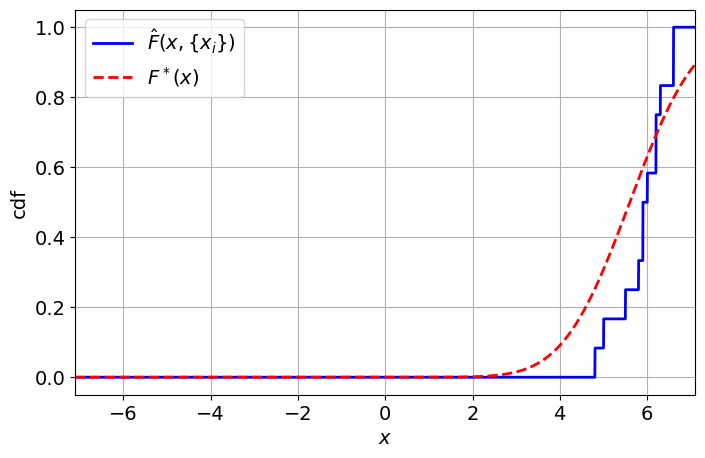

In [10]:
x_i = np.array([4.8, 6.2, 6.0, 5.9, 6.6, 5.5, 5.8, 5.9, 6.3, 6.6, 6.2, 5.0])

xmax = np.ceil(max(np.abs(x_i)))+0.1; xmin = -xmax
x_x = np.linspace(xmin,xmax,6001);

Fhat_x = np.mean(x_i[None,:] <= x_x[:,None],axis=-1); Fstar_x = stats.norm(loc=5.6, scale=1.2).cdf(x_x)

xp = np.argmax(Fstar_x-Fhat_x); xm = np.argmax(Fhat_x-Fstar_x)
plt.plot(x_x,Fhat_x,'b-',lw=2,label=r'$\hat{F}(x,\{x_i\})$'); plt.plot(x_x,Fstar_x,'r--',lw=2,label=r'$F^*(x)$');
plt.xlabel(r'$x$');plt.ylabel('cdf');plt.legend(loc='upper left');plt.grid();plt.xlim(xmin,xmax);

In [11]:
xsort_i = np.sort(x_i)
Fstar_i = stats.norm(loc=5.6, scale=1.2).cdf(xsort_i)

n = len(x_i)
Fhatp_i = np.arange(n)/n
Fhatm_i = (1+np.arange(n))/n

Tp=max(Fstar_i-Fhatp_i) 
Tm=max(Fhatm_i-Fstar_i)

print(Tp, xsort_i[np.argmax(Fstar_i-Fhatp_i)])
print(Tm, xsort_i[np.argmax(Fhatm_i-Fstar_i)])

0.31618383261090366 5.8
0.20232838096364314 6.6


In [12]:
p = stats.ksone(n).sf(Tp) * 2; p

0.1449890844590269

#### Exercise 6.1.2:

As a rural grocery store receives eggs from neighboring farmers it
“candles” the eggs to detect any eggs that are not fresh. Eight crates
of eggs, 144 eggs per crate, were candled with the following numbers of
eggs rejected from each crate: 4, 0, 2, 0, 2, 0, 2, 0. Present a 95%
confidence band, either graphically or in tabled form, for the
distribution function of the number of rejected eggs for the population
of all crates received.

In [13]:
x_i = np.array([4, 0, 2, 0, 2, 0, 2, 0])
n = len(x_i)

T95 = stats.ksone(n).isf(0.025)

print(T95)

xmax = np.ceil(max(np.abs(x_i)))+0.1; xmin = -xmax
x_x = np.linspace(xmin,xmax,6001);
Fhat_x = np.mean(x_i[None,:] <= x_x[:,None],axis=-1);

0.45426659868929475


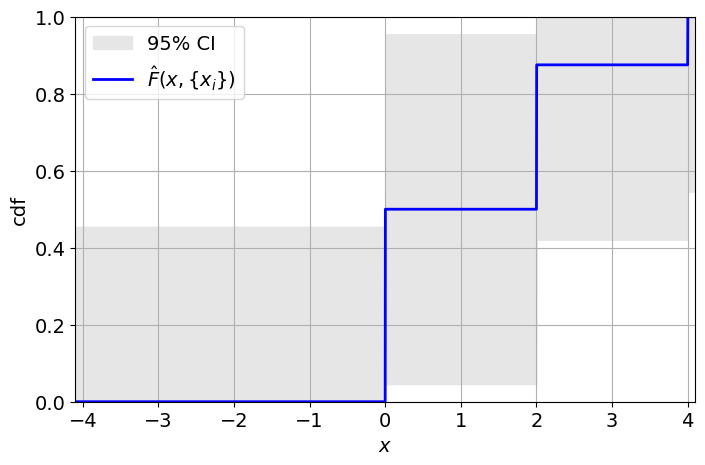

In [14]:
F95lower_x = np.maximum(0.,Fhat_x-T95); F95upper_x = np.minimum(1.,Fhat_x+T95)
plt.fill_between(x_x,F95upper_x,F95lower_x,edgecolor='b',color=[0.9,0.9,0.9],label=r'95% CI');
plt.plot(x_x,Fhat_x,'b-',lw=2,label=r'$\hat{F}(x,\{x_i\})$')
plt.xlabel(r'$x$');plt.ylabel('cdf');plt.xlim(xmin,xmax);plt.ylim(0,1);plt.legend(loc='upper left');plt.grid();

#### Exercise 6.1.4:

Previous records have indicated that the number of rejected eggs per
crate follows the Poisson distribution with mean 1.5. For the data in
Exercise 2 test the hypothesis that these eight crates came from the
same distribution function. Note that the Poisson distribution with mean
$1.5$ has the following probabilites: $P(0)=0.223$, $P(1)=0.335$,
$P(2)=0.251$, $P(3)=0.126$, $P(4)=0.047$, $P(5)=0.014$, and
$P(6)=0.004$.

$H_0$: $F(x)=F^*(x)$

$H_1$: $F(x)\ne F^*(x)$

$T_m = 0.277$ 

$p\text{-value} = 0.4937$

Since $0.4937 > 0.05$, we do not have sufficent evidence to reject $H_0$.

In [15]:
discx_i = np.array([4, 0, 2, 0, 2, 0, 2, 0]) 
discx_x = np.arange(0, discx_i.shape[0]) 

discFhat_x = np.mean(discx_i[None,:] <= discx_x[:,None],axis=-1)
discFstar_x = np.array([0.223, 0.335, 0.251, 0.126, 0.047, 0.014, 0.004, 0]).cumsum()

In [16]:
discTp = max(discFstar_x-discFhat_x)
discTm = max(discFhat_x-discFstar_x)

print(discTp, discTm)

0.06000000000000005 0.277


In [17]:
discn = discx_i.shape[0]

p = stats.ksone(discn).sf(discTm) * 2; p

0.49370258496006797